## How well do jobs and skills pay for Data Analysts?

### Impoting and Cleaning Data

In [1]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

#loading data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skl_lst: ast.literal_eval(skl_lst) if pd.notna(skl_lst) else skl_lst )

### Salary Distribution by Job Title

In [2]:
df_india = df[df.job_country == 'India'].dropna(subset=['salary_year_avg']).copy()

job_titles = df_india['job_title_short'].value_counts().index[:3].tolist()

for i in range(len(job_titles)):
    job_titles.append(f'Senior {job_titles[i]}')
    
df_top6 = df_india[df_india['job_title_short'].isin(job_titles)]

job_order = df_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst',
 'Senior Data Scientist']

### Plot Salary Distribution

C:\Users\Vivek\AppData\Local\Temp\ipykernel_13960\1976322322.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette='light:y_r')


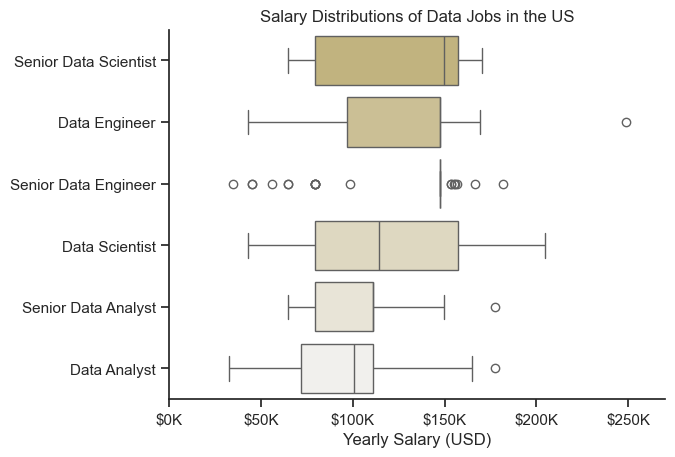

In [25]:
sns.boxplot(data=df_top6, x='salary_year_avg', y='job_title_short', order=job_order, palette='light:y_r')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in the US')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 270000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


### Investigate Median Salary Vs Skill for Data Analysts

In [4]:
df_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_da = df_da.dropna(subset=['salary_year_avg'])

df_da = df_da.explode('job_skills')

df_da[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
11412,50400.0,python
11412,50400.0,sql
11412,50400.0,aws
11412,50400.0,azure
11412,50400.0,excel


### Determine The Highest Paid Skills and Most Demanded Skills

##### Highest Paid Skills:

In [5]:
df_top_pay = df_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_top_pay = df_top_pay.head(10)

df_top_pay

,count,median
job_skills,,
pyspark,1,165000.0
linux,1,165000.0
gitlab,1,165000.0
mysql,1,165000.0
postgresql,1,165000.0
mongodb,6,163782.0
gdpr,2,163782.0
neo4j,1,163782.0
databricks,3,163782.0


##### Most Demanded Skills:

In [6]:
df_skills = df_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_skills = df_skills.head(10).sort_values(by='median', ascending=False)

df_skills

,count,median
job_skills,,
spark,11,111175.0
power bi,17,111175.0
tableau,20,108087.5
excel,39,98500.0
sql,46,96050.0
python,36,96050.0
azure,15,93600.0
r,18,79200.0
aws,12,79200.0


### Ploting HorizontalBar Charts

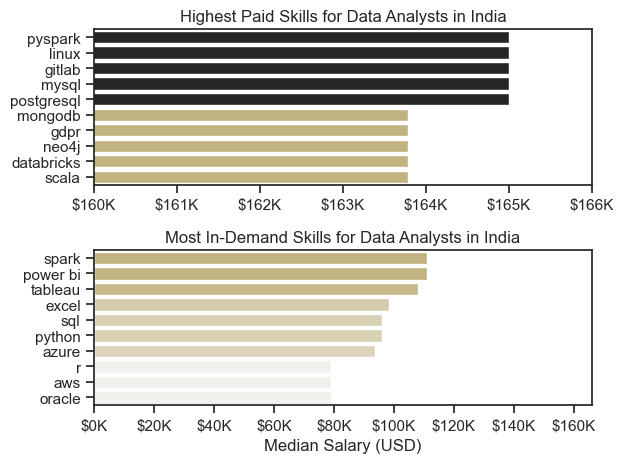

In [28]:
ig, ax = plt.subplots(2, 1)  

sns.barplot(data=df_top_pay, x='median', y=df_top_pay.index, hue='median', ax=ax[0], palette='dark:y_r')
ax[0].legend().remove()

ax[0].set_title('Highest Paid Skills for Data Analysts in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(160000,166000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


sns.barplot(data=df_skills, x='median', y=df_skills.index, hue='median', ax=ax[1], palette='light:y')
ax[1].legend().remove()

ax[1].set_title('Most In-Demand Skills for Data Analysts in India')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(0, 166000)  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()